In [ ]:
# Code Cell 1 → Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [ ]:
csv_path = 'globalterrorismdb_0718dist.csv'
df = pd.read_csv(csv_path, encoding='latin1')
df.head()

/tmp/ipython-input-1875365375.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path, encoding='latin1')


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
# Code Cell 3 → Variable selection + describe()

# Preview columns
print("Available Columns:\n")
print(df.columns.tolist())

# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumeric Columns:\n", numeric_cols)

# Select 3–7 meaningful numeric variables manually (EDIT THIS LIST BASED ON YOUR DATASET)
selected_vars = numeric_cols[:5]   # <-- You will later refine based on relevance

print("\nSelected Variables for Frequency Distribution:\n", selected_vars)

# Basic statistics for selected variables
df[selected_vars].describe()

Available Columns:

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 

,eventid,iyear,imonth,iday,extended
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000


In [ ]:
# Code Cell 4 → Functions (frequency table + plots)

def frequency_distribution(data, bins=8):
    """
    Generates frequency table with:
    Class Intervals, Frequency, Relative Frequency,
    Cumulative Frequency, Relative Cumulative Frequency
    """
    freq, edges = np.histogram(data.dropna(), bins=bins)

    rel_freq = freq / freq.sum()
    cum_freq = np.cumsum(freq)
    rel_cum_freq = np.cumsum(rel_freq)

    # Build table
    table = pd.DataFrame({
        "Class Interval": [f"{edges[i]:.2f} – {edges[i+1]:.2f}" for i in range(len(edges)-1)],
        "Frequency": freq,
        "Relative Frequency": rel_freq,
        "Cumulative Frequency": cum_freq,
        "Relative Cumulative Frequency": rel_cum_freq
    })
    return table, edges, freq


def plot_histogram(data, edges, varname):
    plt.figure(figsize=(8,5))
    sns.histplot(data, bins=edges, kde=False)
    plt.title(f"Histogram of {varname}")
    plt.xlabel(varname)
    plt.ylabel("Frequency")
    plt.show()


def plot_frequency_polygon(edges, freq, varname):
    midpoints = (edges[:-1] + edges[1:]) / 2
    plt.figure(figsize=(8,5))
    plt.plot(midpoints, freq, marker="o")
    plt.title(f"Frequency Polygon of {varname}")
    plt.xlabel(varname)
    plt.ylabel("Frequency")
    plt.show()


def plot_ogive(edges, freq, varname):
    cum_freq = np.cumsum(freq)
    plt.figure(figsize=(8,5))
    plt.plot(edges[1:], cum_freq, marker="o")
    plt.title(f"Ogive (Cumulative Frequency Graph) for {varname}")
    plt.xlabel("Upper Class Boundaries")
    plt.ylabel("Cumulative Frequency")
    plt.show()

In [ ]:
# Code Cell 5 → Frequency tables for all variables

frequency_tables = {}

for var in selected_vars:
    print(f"\n=== Frequency Distribution Table for {var} ===\n")
    table, edges, freq = frequency_distribution(df[var])
    frequency_tables[var] = (table, edges, freq)
    display(table)



=== Frequency Distribution Table for eventid ===



,Class Interval,Frequency,Relative Frequency,Cumulative Frequency,Relative Cumulative Frequency
0,197000000001.00 – 197589038754.88,3484,0.019175,3484,0.019175
1,197589038754.88 – 198178077508.75,11679,0.064279,15163,0.083455
2,198178077508.75 – 198767116262.62,17866,0.098332,33029,0.181787
3,198767116262.62 – 199356155016.50,21686,0.119356,54715,0.301143
4,199356155016.50 – 199945193770.38,15120,0.083218,69835,0.384361
5,199945193770.38 – 200534232524.25,9514,0.052364,79349,0.436725
6,200534232524.25 – 201123271278.12,25429,0.139957,104778,0.576682
7,201123271278.12 – 201712310032.00,76913,0.423318,181691,1.000000



=== Frequency Distribution Table for iyear ===



,Class Interval,Frequency,Relative Frequency,Cumulative Frequency,Relative Cumulative Frequency
0,1970.00 – 1975.88,3484,0.019175,3484,0.019175
1,1975.88 – 1981.75,11678,0.064274,15162,0.083449
2,1981.75 – 1987.62,17867,0.098337,33029,0.181787
3,1987.62 – 1993.50,21686,0.119356,54715,0.301143
4,1993.50 – 1999.38,15121,0.083224,69836,0.384367
5,1999.38 – 2005.25,9514,0.052364,79350,0.436730
6,2005.25 – 2011.12,25428,0.139952,104778,0.576682
7,2011.12 – 2017.00,76913,0.423318,181691,1.000000



=== Frequency Distribution Table for imonth ===



,Class Interval,Frequency,Relative Frequency,Cumulative Frequency,Relative Cumulative Frequency
0,0.00 – 1.50,14956,0.082316,14956,0.082316
1,1.50 – 3.00,13879,0.076388,28835,0.158704
2,3.00 – 4.50,30409,0.167367,59244,0.326070
3,4.50 – 6.00,16875,0.092877,76119,0.418948
4,6.00 – 7.50,31627,0.174070,107746,0.593018
5,7.50 – 9.00,15800,0.086961,123546,0.679979
6,9.00 – 10.50,29743,0.163701,153289,0.843680
7,10.50 – 12.00,28402,0.156320,181691,1.000000



=== Frequency Distribution Table for iday ===



,Class Interval,Frequency,Relative Frequency,Cumulative Frequency,Relative Cumulative Frequency
0,0.00 – 3.88,19200,0.105674,19200,0.105674
1,3.88 – 7.75,23775,0.130854,42975,0.236528
2,7.75 – 11.62,23916,0.131630,66891,0.368158
3,11.62 – 15.50,24583,0.135301,91474,0.503459
4,15.50 – 19.38,23817,0.131085,115291,0.634544
5,19.38 – 23.25,23338,0.128449,138629,0.762993
6,23.25 – 27.12,23387,0.128719,162016,0.891712
7,27.12 – 31.00,19675,0.108288,181691,1.000000



=== Frequency Distribution Table for extended ===



,Class Interval,Frequency,Relative Frequency,Cumulative Frequency,Relative Cumulative Frequency
0,0.00 – 0.12,173452,0.954654,173452,0.954654
1,0.12 – 0.25,0,0.000000,173452,0.954654
2,0.25 – 0.38,0,0.000000,173452,0.954654
3,0.38 – 0.50,0,0.000000,173452,0.954654
4,0.50 – 0.62,0,0.000000,173452,0.954654
5,0.62 – 0.75,0,0.000000,173452,0.954654
6,0.75 – 0.88,0,0.000000,173452,0.954654
7,0.88 – 1.00,8239,0.045346,181691,1.000000



=== Histogram for eventid ===



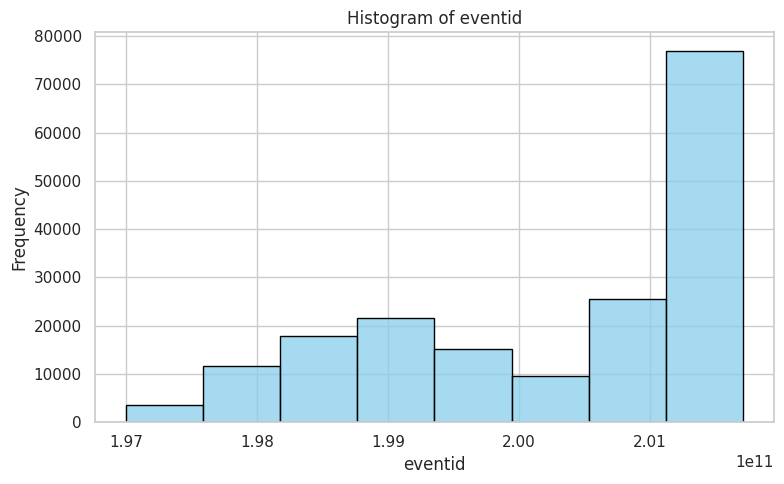


=== Histogram for iyear ===



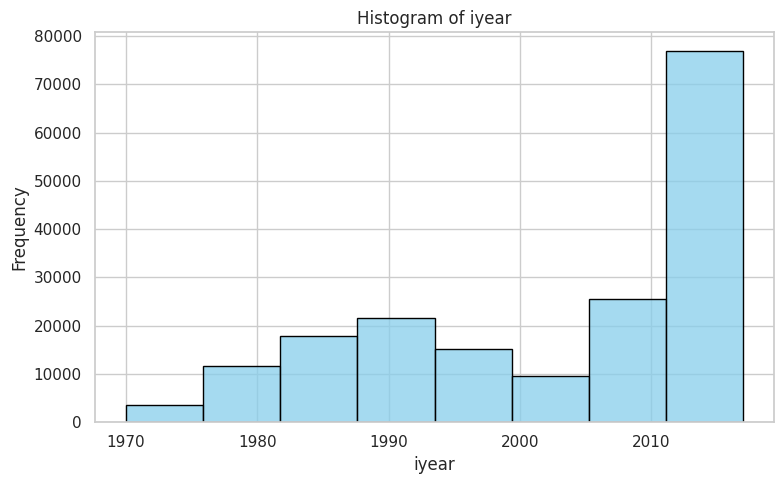


=== Histogram for imonth ===



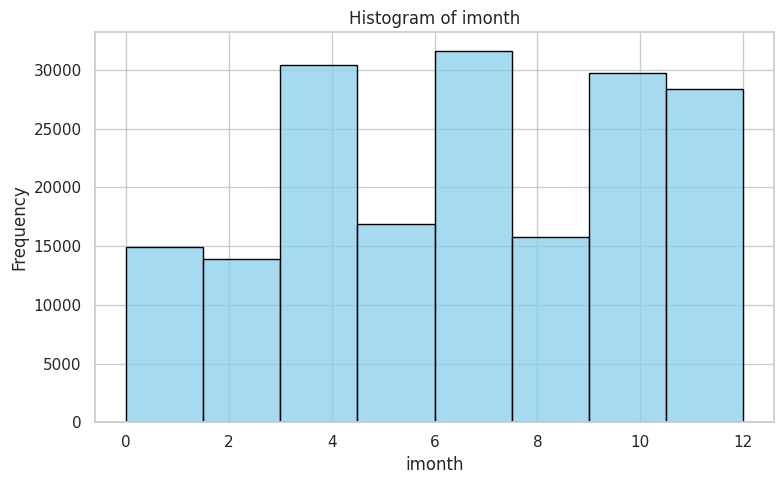


=== Histogram for iday ===



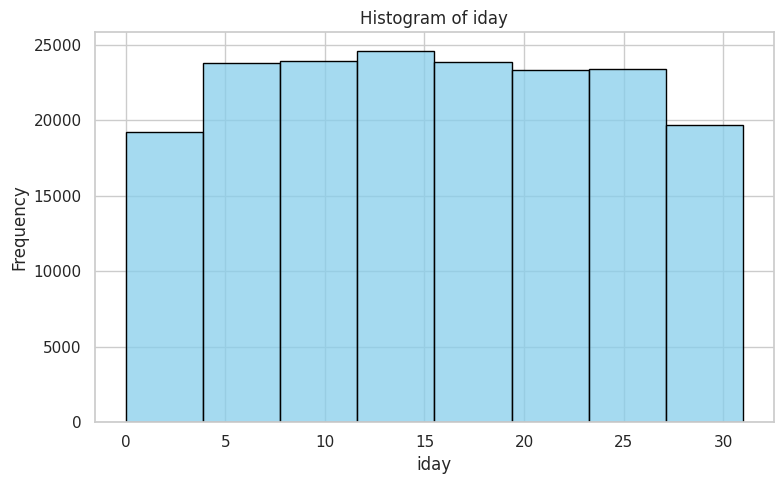


=== Histogram for extended ===



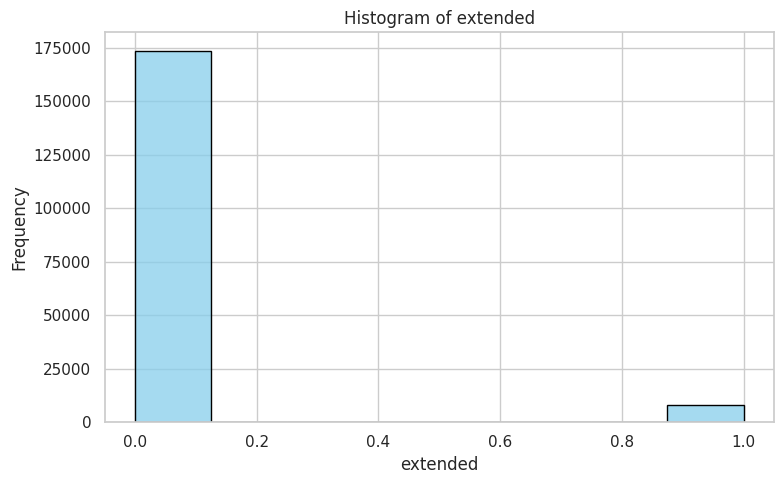

In [ ]:
# Code Cell 6 → Histograms for all selected variables

for var in selected_vars:
    print(f"\n=== Histogram for {var} ===\n")

    table, edges, freq = frequency_tables[var]

    plt.figure(figsize=(8, 5))
    sns.histplot(df[var].dropna(), bins=edges, kde=False, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


=== Frequency Polygon for eventid ===



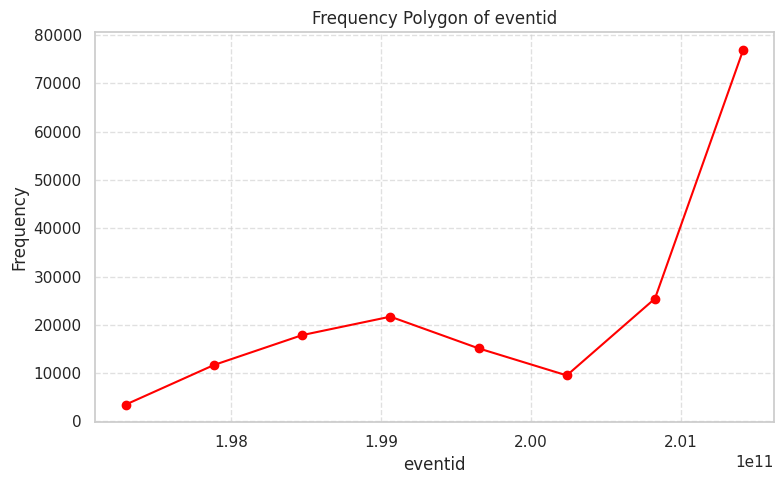


=== Frequency Polygon for iyear ===



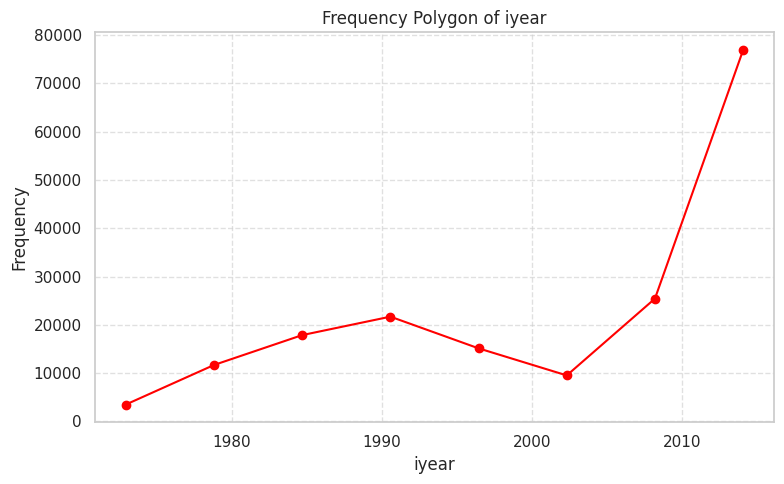


=== Frequency Polygon for imonth ===



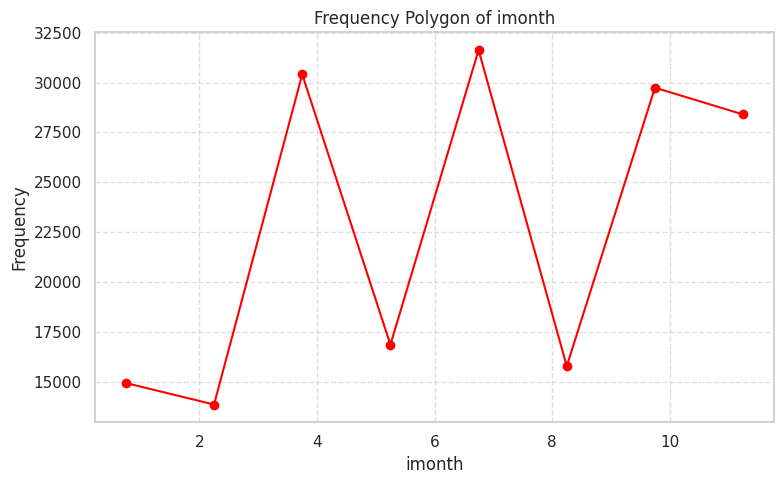


=== Frequency Polygon for iday ===



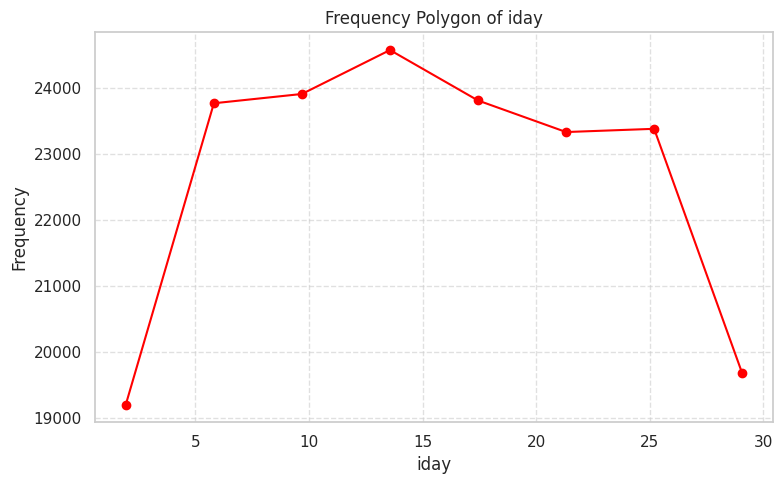


=== Frequency Polygon for extended ===



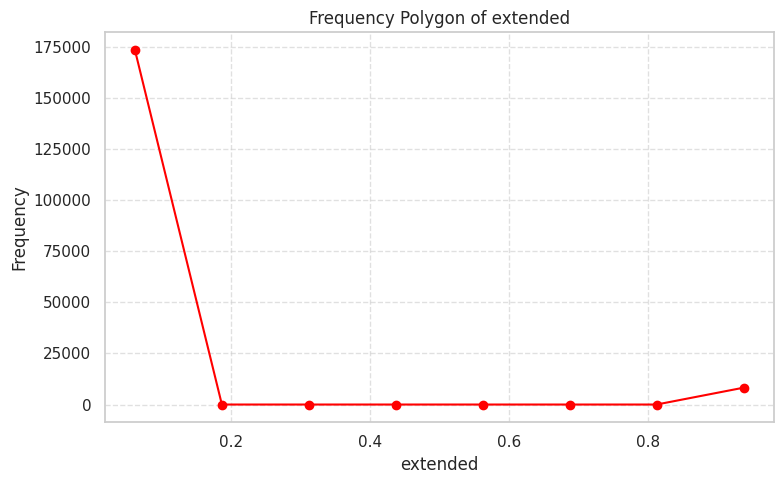

In [ ]:
# Code Cell 7 → Frequency Polygons for all selected variables

for var in selected_vars:
    print(f"\n=== Frequency Polygon for {var} ===\n")

    table, edges, freq = frequency_tables[var]
    midpoints = (edges[:-1] + edges[1:]) / 2

    plt.figure(figsize=(8, 5))
    plt.plot(midpoints, freq, marker="o", color="red")
    plt.title(f"Frequency Polygon of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


=== Ogive (Cumulative Frequency Graph) for eventid ===



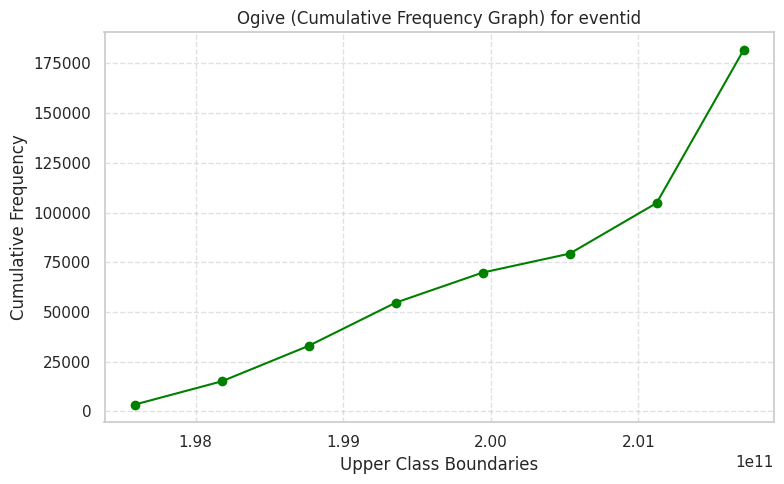


=== Ogive (Cumulative Frequency Graph) for iyear ===



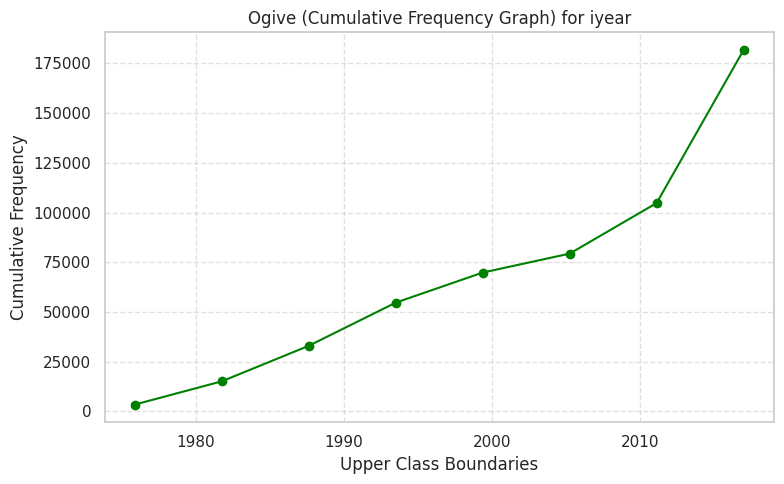


=== Ogive (Cumulative Frequency Graph) for imonth ===



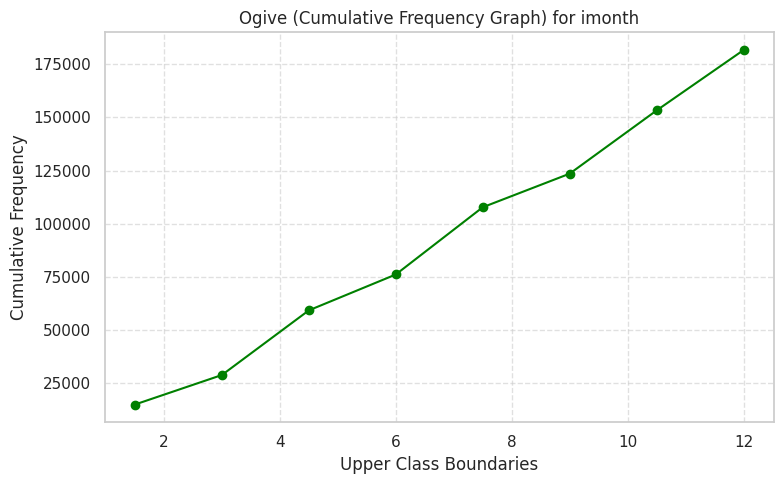


=== Ogive (Cumulative Frequency Graph) for iday ===



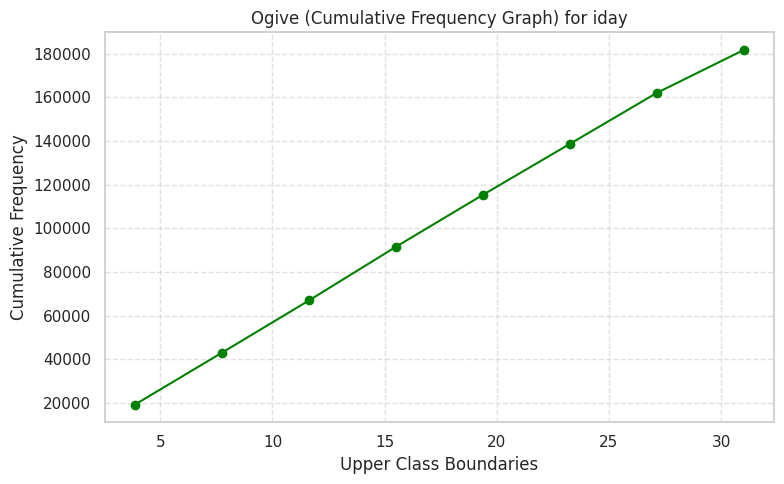


=== Ogive (Cumulative Frequency Graph) for extended ===



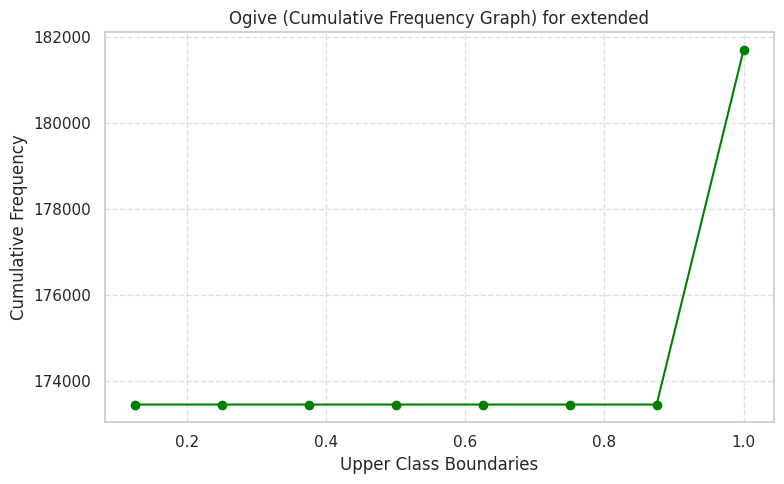

In [ ]:
# Code Cell 8 → Ogives for all selected variables

for var in selected_vars:
    print(f"\n=== Ogive (Cumulative Frequency Graph) for {var} ===\n")

    table, edges, freq = frequency_tables[var]
    cum_freq = np.cumsum(freq)

    plt.figure(figsize=(8, 5))
    plt.plot(edges[1:], cum_freq, marker="o", color="green")
    plt.title(f"Ogive (Cumulative Frequency Graph) for {var}")
    plt.xlabel("Upper Class Boundaries")
    plt.ylabel("Cumulative Frequency")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

### Column Selection Justification

The initial selection of variables for frequency distribution ('eventid', 'iyear', 'imonth', 'iday', 'extended') was based on taking the first few numeric columns identified in the dataset. While `eventid` serves as a unique identifier and its distribution primarily confirms its unique nature, the other selected variables provide more direct insights into the temporal characteristics of terrorist attacks:

*   **`iyear` (Year)**: Essential for understanding the trends and evolution of terrorism over time. Its frequency distribution reveals periods of increased or decreased activity.
*   **`imonth` (Month)**: Helps to identify any seasonal patterns or specific months where terrorist activities might be more prevalent.
*   **`iday` (Day)**: While often less indicative of strong patterns than year or month, it can still show the distribution of attacks across the days of a month.
*   **`extended`**: This binary variable (0 or 1) indicates whether an incident was extended beyond a single day. Its distribution helps in understanding the proportion of prolonged attacks within the dataset.

For a more in-depth analysis, other numeric variables such as `'nkill'` (number of fatalities), `'nwound'` (number of wounded), `'country'` (country codes), `'region'` (region codes), `'attacktype1'` (primary attack type), and `'targtype1'` (primary target type) would also be highly relevant to understand the impact, geographical spread, and methodologies of terrorist acts.

### Analysis and Conclusion

This analysis focused on generating frequency distributions and visualizing them through histograms, frequency polygons, and ogives for the variables 'eventid', 'iyear', 'imonth', 'iday', and 'extended' from the Global Terrorism Database.

#### `eventid`:
As expected, the `eventid` variable, being a unique identifier for each event, showed a uniform distribution across its range. The frequency tables and plots for `eventid` primarily confirm that each incident has a distinct ID, and there's no particular clustering of `eventid` values that would be analytically meaningful in terms of frequency.

#### `iyear` (Year of Attack):
The frequency distribution for `iyear` (year) is particularly insightful. The histogram and frequency polygon clearly illustrate a significant increase in terrorist activities over the years, particularly from the early 2000s onwards, peaking in the 2010s. The ogive demonstrates the cumulative growth of recorded terrorist incidents over the dataset's timeline, confirming a steeper incline in later years. This suggests a global escalation of terrorism in recent decades covered by the dataset.

#### `imonth` (Month of Attack):
The distribution of `imonth` (month) appears relatively spread out across the year. While there might be minor fluctuations, no single month stands out dramatically as having a consistently higher or lower frequency of attacks. This implies that terrorist activities, at a global level, do not exhibit strong monthly seasonality.

#### `iday` (Day of Attack):
Similar to `imonth`, the frequency distribution for `iday` (day of the month) shows a fairly uniform spread. There isn't a discernible pattern indicating that attacks are more likely to occur on certain days of the month. This suggests that the timing of attacks within a month is largely opportunistic or driven by factors other than the specific day number.

#### `extended` (Extended Attack):
The `extended` variable, a binary indicator (0 for non-extended, 1 for extended), reveals the proportion of attacks that were prolonged. The histograms and frequency tables show that the vast majority of terrorist incidents are not extended (i.e., they are single-day events). Only a small fraction of incidents are categorized as 'extended', indicating that multi-day or prolonged terrorist operations are relatively rare compared to single-event attacks. The ogive for this variable quickly plateaus after accounting for the non-extended events, further emphasizing this distribution.

In conclusion, the temporal analysis highlighted a clear upward trend in global terrorist incidents over the years, with no strong monthly or daily seasonality observed. Most attacks recorded are non-extended events. This initial exploration provides a foundational understanding of the dataset's temporal characteristics and points towards the need for deeper analysis into the causes of the increasing trend and the nature of extended versus non-extended attacks, perhaps by correlating with other factors like target type, weapon type, or geographic region.

### Challenge Faced

During the initial data loading phase, a `DtypeWarning` was encountered:

`DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.`

This warning indicates that pandas detected that certain columns in the CSV file contained mixed data types. For example, a column might have numbers in some rows and text in others. When pandas encounters this, it tries to infer the best data type, but it might not always get it right, or it might consume more memory by reading the entire file to determine types. While this warning did not prevent the data from loading or the subsequent analysis from proceeding, it's an important note for future, more rigorous data cleaning or type conversion steps. For exploratory analysis, it was deemed acceptable, but for production-level work, explicitly defining column dtypes or using `low_memory=False` might be necessary to avoid potential data interpretation issues.